# Comparing Python engine with CAMB

In [1]:
import numpy as np
import camb
import matplotlib.pyplot as plt

from engine import *

In [2]:
cosmo = {
    "omega_m": 0.3,
    "w0": -0.838,
    "wa": -0.62,
    "cs2": 1,
    "alpha_K_0": 1e-3,
}

solve_alpha_B_py = solve_alpha_B
def solve_alpha_B_ft(aktype, alpha_K_0, cs2, omega_m, w0, wa):
    ombh2 = 0.0122
    h = 0.7
    omch2 = (omega_m - ombh2/h**2)*h**2
    cosmo = camb.set_params(
        H0=100*h, ombh2=ombh2, omch2=omch2, num_nu_massless=3.044, omnuh2=0,
        As=2.1e-9, ns=0.96, tau=0.06, WantTransfer=True, w=w0, wa=wa,
        dark_energy_model="fluid" if (1+w0)*(1+w0+wa) > 0 else "ppf",
        alpha_K_parametrization=aktype-1, cs2_0=cs2, use_cs2=True, alpha_K_0=alpha_K_0
    )
    results = camb.get_background(cosmo)
    log_a = results.Params.log_a
    alpha_B = results.Params.alpha_B
    alpha_K = results.Params.alpha_K
    mu = results.Params.mu
    return log_a*np.log10(np.e), alpha_B, alpha_K, mu

def compare(aktype, cosmodict):
    log_a_py, alpha_B_py, alpha_K_py, mu_py = solve_alpha_B_py(aktype=aktype, **cosmodict)
    log_a_ft, alpha_B_ft, alpha_K_ft, mu_ft = solve_alpha_B_ft(aktype=aktype, **cosmodict)
    plt.plot(log_a_py, mu_py, label="Python")
    plt.plot(log_a_ft, mu_ft, label="CAMB")
    plt.xlabel("$\\log(a)$")
    plt.ylabel("$\\mu$")
    plt.legend()
    plt.show()

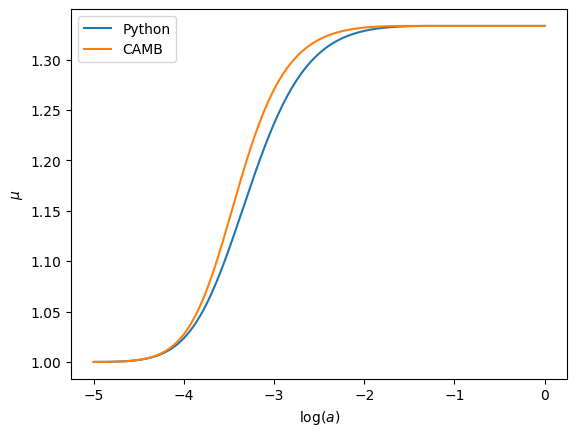

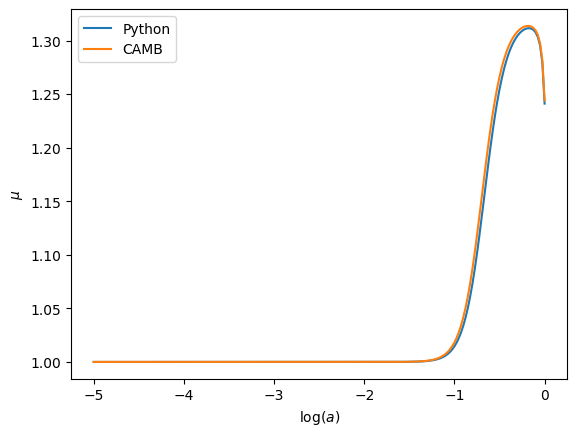

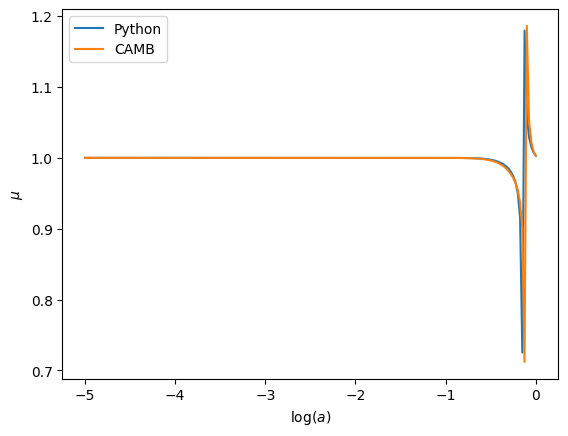

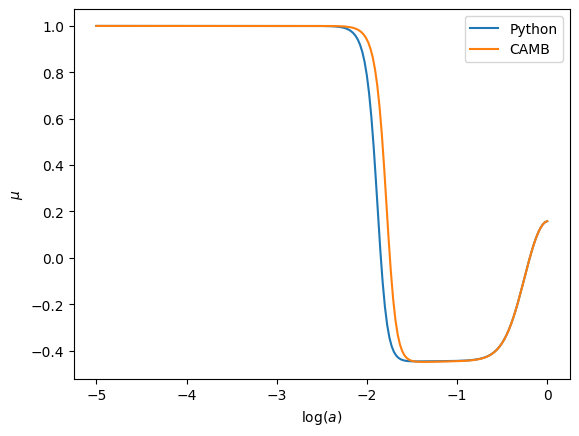

In [3]:
compare(alphaKtype.CONST, cosmo)
compare(alphaKtype.OMEGA, cosmo)
compare(alphaKtype.QUINT, cosmo)
compare(alphaKtype.CUGAL, cosmo)